In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

Load all signals from a file

In [ ]:
def load_signals(file_path):
    with open(file_path, 'r') as file:
        signals = []
        for line in file:
            signal = np.array([float(x) for x in line.strip().split('|') if x])  # Parse each row as a signal
            signals.append(signal)
        return np.array(signals)

In [7]:
def mean_removal(signals):
    return signals - np.mean(signals, axis=1, keepdims=True)

Bandpass Filter

In [5]:
def bandpass_filter(signals, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signals = np.array([filtfilt(b, a, signal) for signal in signals])
    return filtered_signals

In [6]:
def normalize(signals):
    min_vals = np.min(signals, axis=1, keepdims=True)
    max_vals = np.max(signals, axis=1, keepdims=True)
    return (signals - min_vals) / (max_vals - min_vals)

In [8]:
def plot_signal(original, processed, title1="Original Signal", title2="Processed Signal"):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(original, label='Original Signal')
    plt.title(title1)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(processed, label='Processed Signal', color='orange')
    plt.title(title2)
    plt.legend()

    plt.tight_layout()
    plt.show()

399


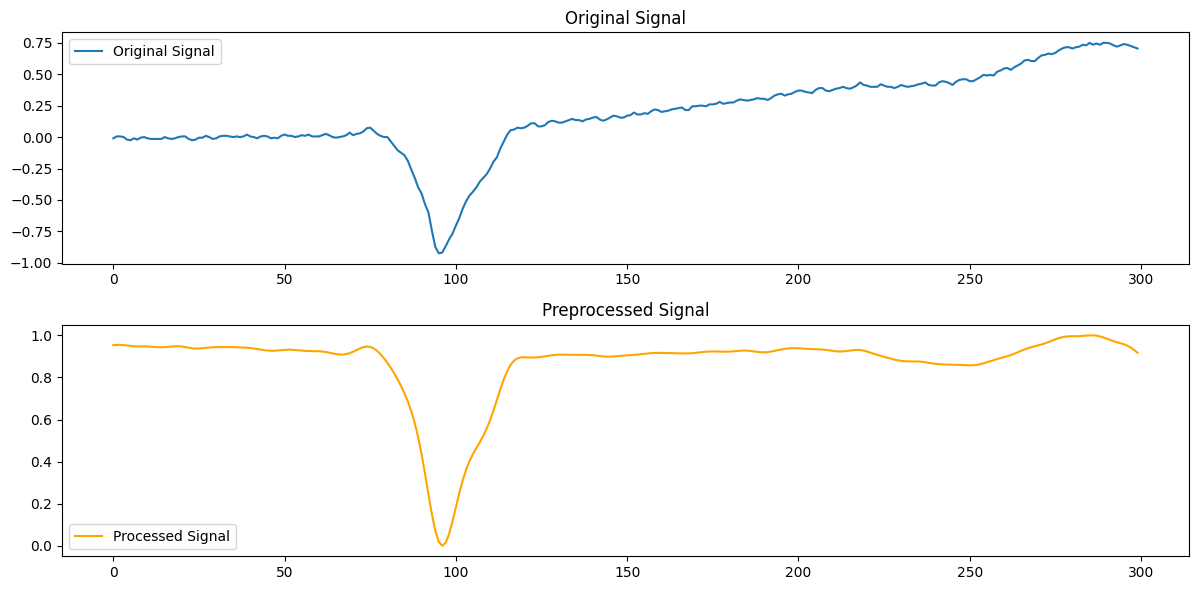

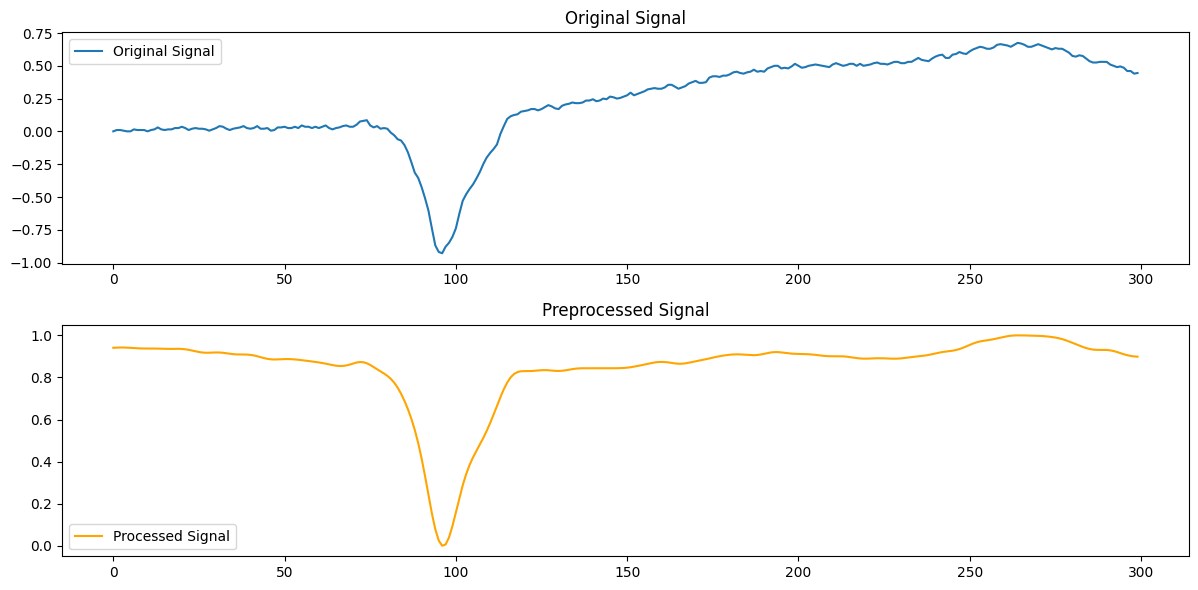

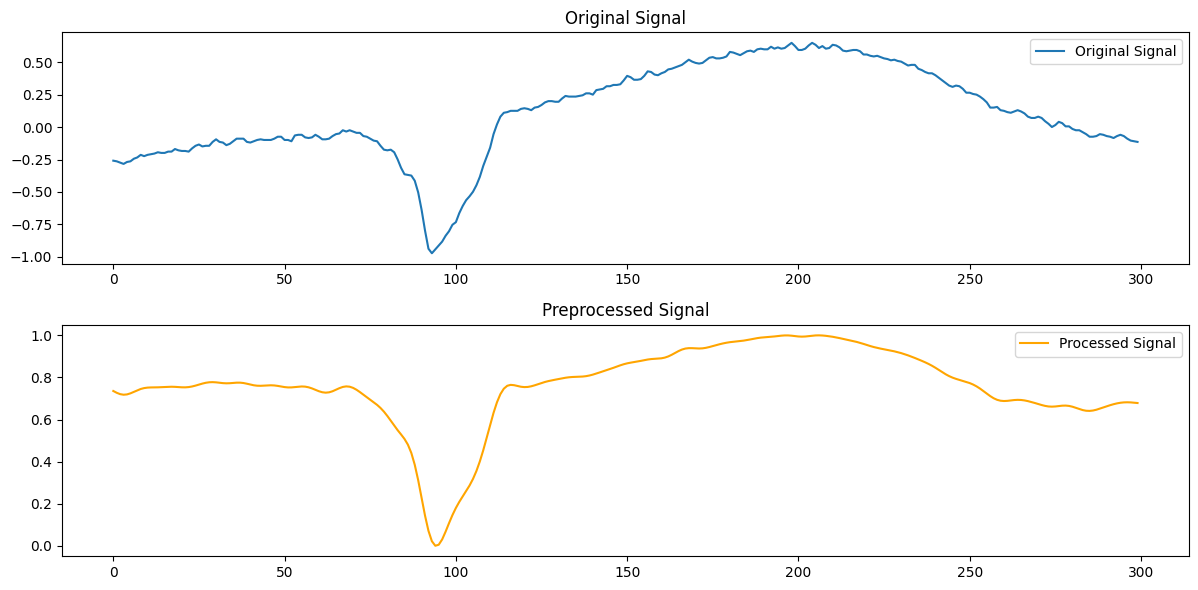

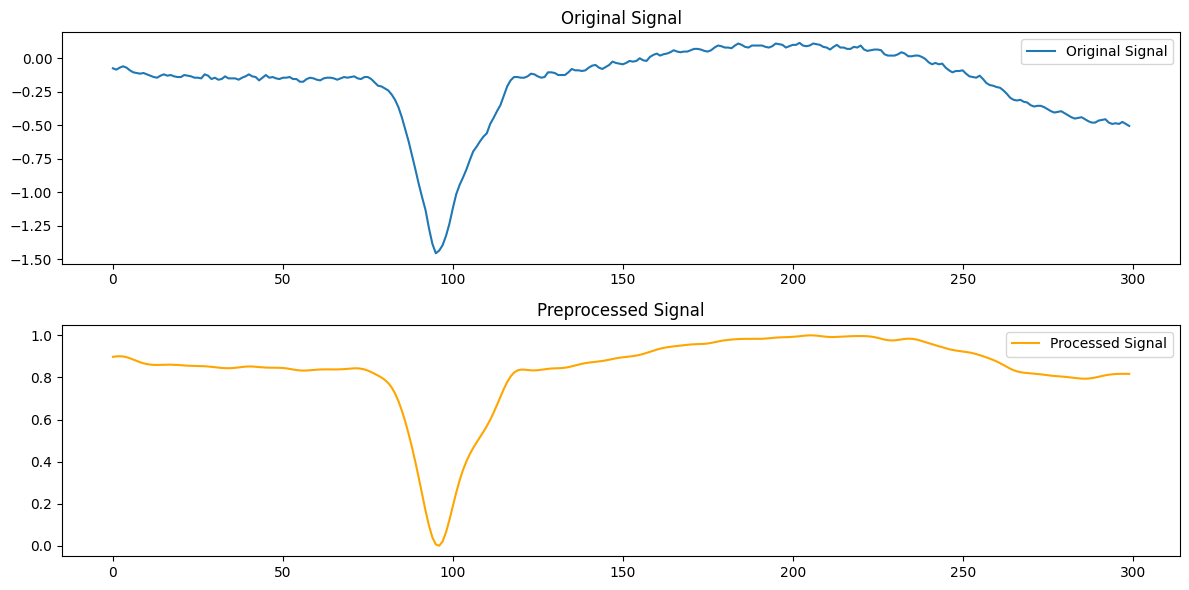

200


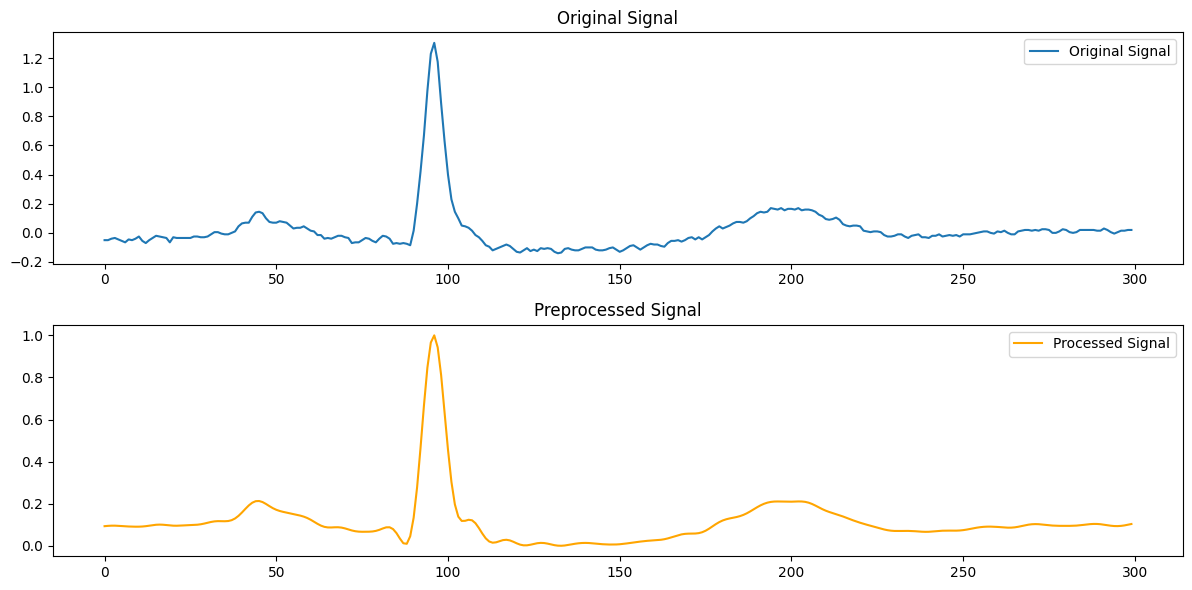

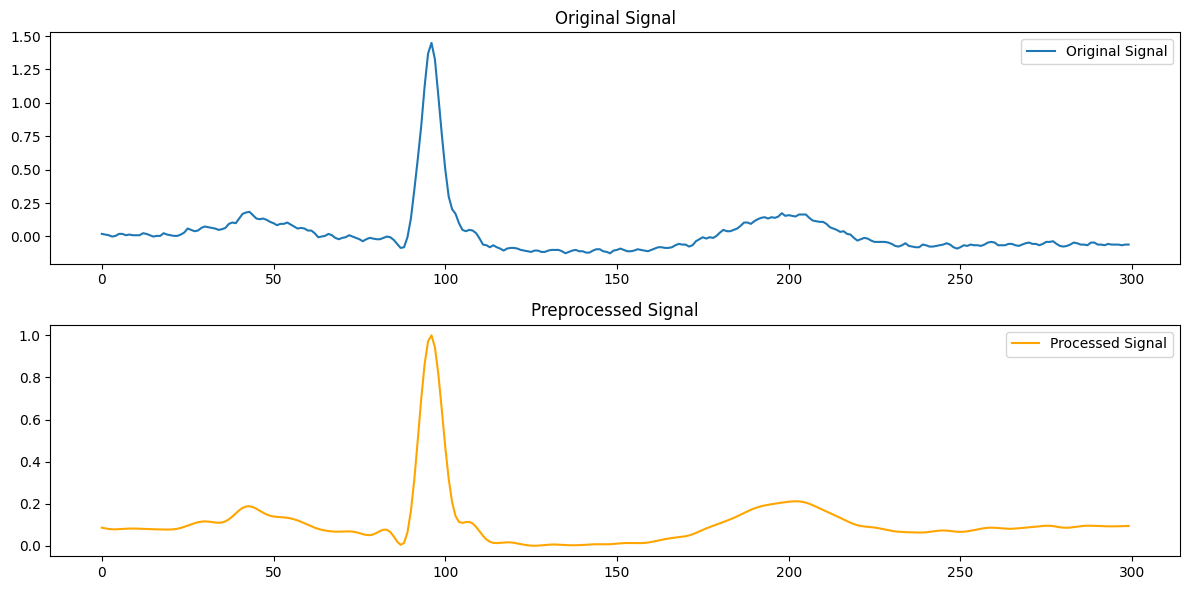

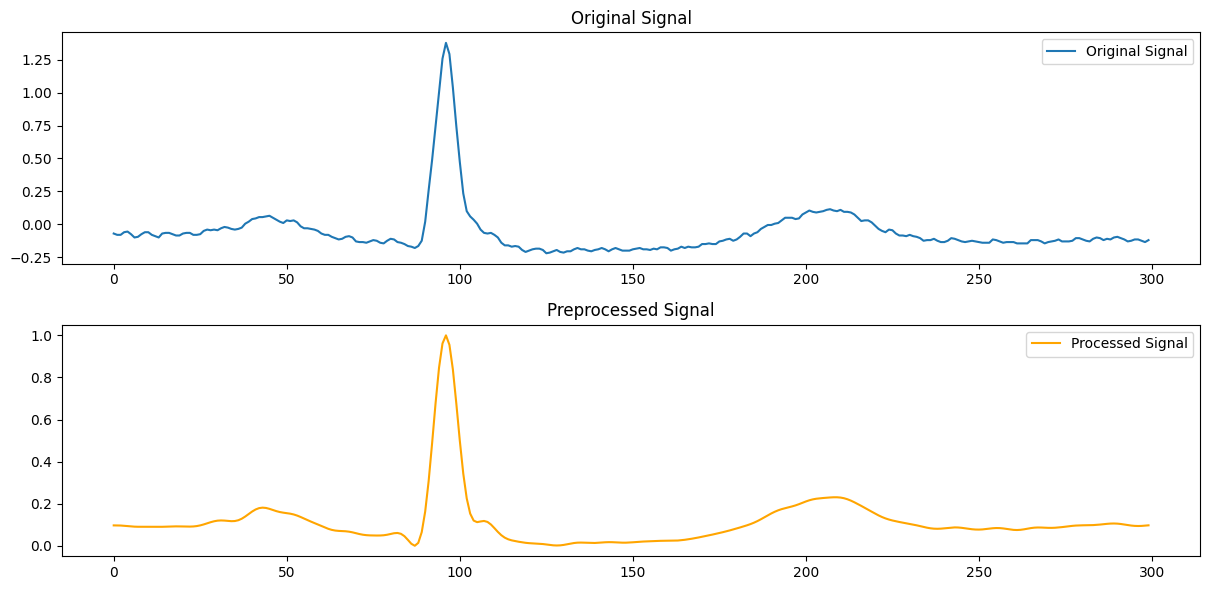

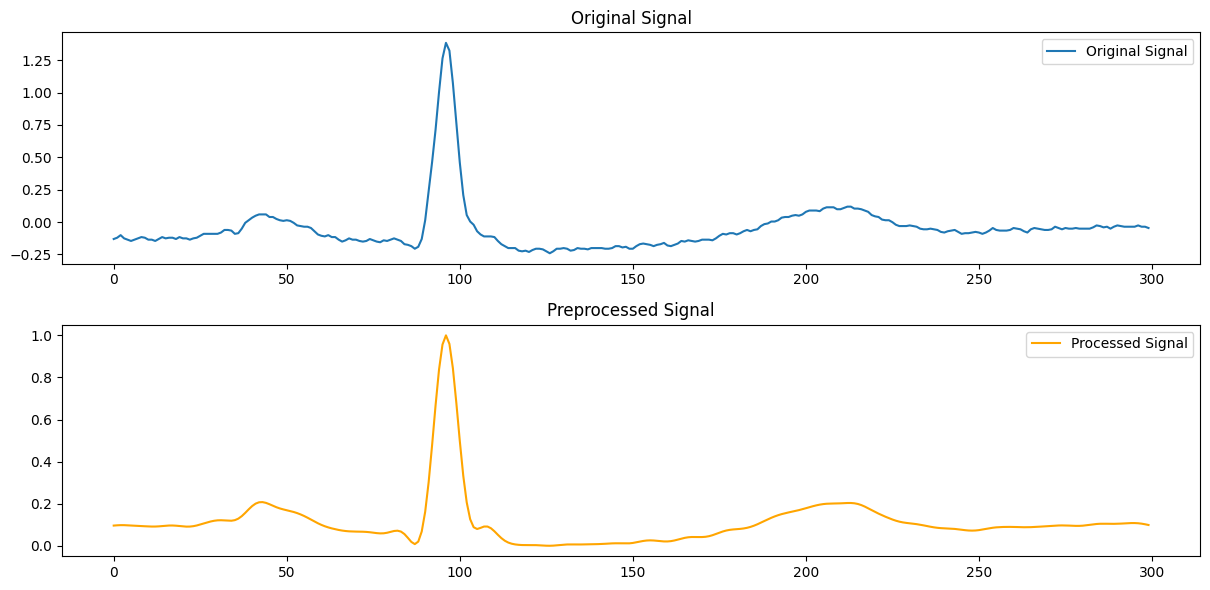

In [12]:
file_path = "/content/LBBB_Train.txt"  # Update with the correct file path
fs = 360  # Sampling frequency of the MIT-BIH dataset

# Load all signals
signals = load_signals(file_path)

# Step 1: Preprocessing
signals_mean_removed = mean_removal(signals)
signals_filtered = bandpass_filter(signals_mean_removed, 0.5, 40, fs)
signals_normalized = normalize(signals_filtered)


# Plot Signals (for the first signal as an example)
print(len(signals))
plot_signal(signals[0], signals_normalized[0], title2="Preprocessed Signal")
plot_signal(signals[1], signals_normalized[1], title2="Preprocessed Signal")
plot_signal(signals[2], signals_normalized[2], title2="Preprocessed Signal")
plot_signal(signals[3], signals_normalized[3], title2="Preprocessed Signal")

file_path = "/content/Normal_Train.txt"
# Load all signals
signals = load_signals(file_path)

# Step 1: Preprocessing
signals_mean_removed = mean_removal(signals)
signals_filtered = bandpass_filter(signals_mean_removed, 0.5, 40, fs)
signals_normalized = normalize(signals_filtered)

print(len(signals))
plot_signal(signals[0], signals_normalized[0], title2="Preprocessed Signal")
plot_signal(signals[1], signals_normalized[1], title2="Preprocessed Signal")
plot_signal(signals[2], signals_normalized[2], title2="Preprocessed Signal")
plot_signal(signals[3], signals_normalized[3], title2="Preprocessed Signal")